## Dimensionality Reduction and Clustering

For this homework we will be using some image data! Specifically, the MNIST data set. You can load this data easily with the following commands:

In [32]:
#This code didn't work and I had already downloaded it from kaggle before you sent the new code

#from sklearn.datasets import fetch_mldata

#mnist = fetch_mldata("MNIST original")
#X = mnist.data / 255.0
#y = mnist.target

The MNIST data set is hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

Source: https://www.kaggle.com/c/digit-recognizer/data

For this homework, perform the following with the MNIST data:

1. Use PCA to reduce the dimensionality

    a. How many components did you use? Why?
    
    b. Plot the first two components. Do you notice any trends? What is this plot showing us?
    
    c. Why would you use PCA? What is it doing? And what are the drawbacks?
    
    d. Plot some of the images, then compress them using PCA and plot again. How does it look?
    
2. Use t-SNE to plot the first two components (you should probably random sample around 10000 points):

    a. How does this plot differ from your PCA plot?
    
    b. How robust is it to changes in perplexity?
    
    c. How robust is it to different learning rate and number of iterations?
    
3. Perform k-means clustering:

    a. How did you choose k?
    
    b. How did you evaluate your clustering?
    
    c. Visualize your clusters using t-sne
    
    d. Did you scale your data?
    
    e. How robust is your clustering?
    
4. Perform hierarchical clustering:

    a. Plot your dendrogram
    
    b. How many clusters seem reasonable based off your graph?
    
    c. How does your dendrogram change with different linkage methods?

### Grading

This homework is due **March 28, 2019 by 4:00 pm Utah time.** By that time, you need to have committed all your code to your github and submitted a link to your work to the TA. We can see on your Github account when you last committed code. :)

Rubric:

* Code Quality - 10%
* Storytelling - 10%
* PCA - 20%
* T-SNE - 20%
* K-means - 20%
* Hierarchical Clustering - 20%

In [34]:
import math
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
from scipy.stats import skew
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import completeness_score
from sklearn.metrics import adjusted_rand_score
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
#load the data
train = pd.read_csv('hw5train.csv')
test = pd.read_csv('hw5test.csv')

In [39]:
#Split the data
X = train.drop(['label'], axis='columns', inplace=False) / 255.0
y = train['label']

In [40]:
from sklearn.datasets import fetch_openml
x, Y = fetch_openml('mnist_784', version=1, return_X_y=True)

# PCA

In [4]:
#Helper functions I found online to plot the image

# Plots the image represented by a row
def plot_number(row, w=28, h=28, labels=True):
    if labels:
        # the first column contains the label
        label = row[0]
        # The rest of columns are pixels
        pixels = row[1:]
    else:
        label = ''
        # The rest of columns are pixels
        pixels = row[0:]
    
#    print(row.shape, pixels.shape)
        

    # Make those columns into a array of 8-bits pixels
    # This array will be of 1D with length 784
    # The pixel intensity values are integers from 0 to 255
    pixels = 255-np.array(pixels, dtype='uint8')

    # Reshape the array into 28 x 28 array (2-dimensional array)
    pixels = pixels.reshape((w, h))

    # Plot
    if labels:
        plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')

# Plots a whole slice of pictures
def plot_slice(rows, size_w=28, size_h=28, labels=True):
    num = rows.shape[0]
    w = 4
    h = math.ceil(num / w)
    fig, plots = plt.subplots(h, w)
    fig.tight_layout()

    for n in range(0, num):
        s = plt.subplot(h, w, n+1)
        s.set_xticks(())
        s.set_yticks(())
        plot_number(rows.ix[n], size_w, size_h, labels)
    plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


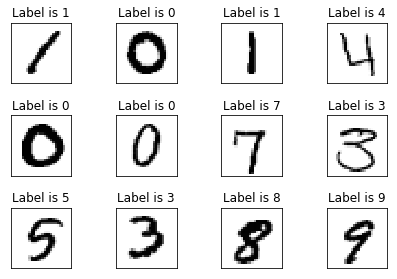

In [5]:
# Plotting first few rows
plot_slice(train[0:12])

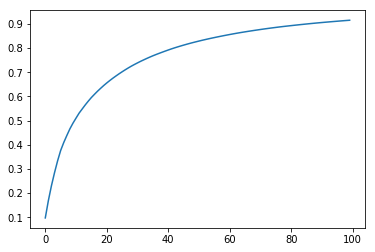

In [6]:
#graph the cum_ratios 
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)

In [7]:
index_95 = np.argmax(cum_ratio >= 0.95)
print(index_95)
print(cum_ratio[index_95])

0
0.09748937689497467


In [8]:
#I want to use a perfect square to see how the reduced-dimension image looks
print(cum_ratio[16])
print(cum_ratio[25])
print(cum_ratio[36])
print(cum_ratio[49])
print(cum_ratio[64])
print(cum_ratio[81])

0.608545337808947
0.7016953775306389
0.772856812650311
0.82555221027562
0.8647395043666629
0.8939122735274588


In [9]:
#Before the numbers plotted were more gray-scale with more 'noise' but now whiten=False is not working and I don't know why

#Using 16 components
pca16 = PCA(n_components=16, whiten=False)
X_pca16 = pca16.fit_transform(X)

In [10]:
#Using 49 components
pca49 = PCA(n_components=49, whiten=False)
X_pca49 = pca49.fit_transform(X)

In [11]:
#Using 81 components
pca81 = PCA(n_components=81, whiten=False)
X_pca81 = pca81.fit_transform(X)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


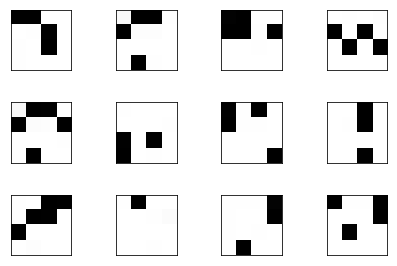

In [12]:
# Plotting first few rows with 16 components (again not sure why white=False is not working)
plot_slice(pd.DataFrame(data=X_pca16[:12]), size_w=4, size_h=4, labels=False)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


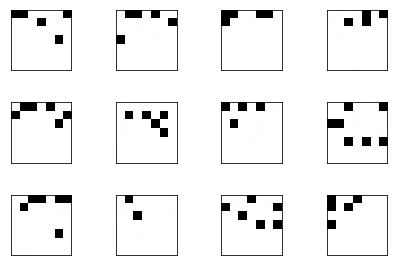

In [13]:
# Plotting first few rows with 49 components
plot_slice(pd.DataFrame(data=X_pca49[0:12]), size_w=7, size_h=7, labels=False)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


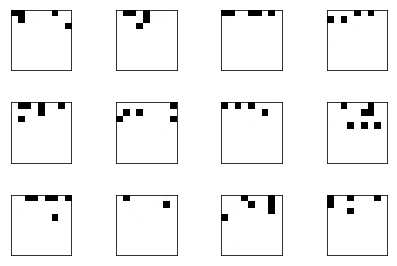

In [14]:
# Plotting first few rows with 81 components
plot_slice(pd.DataFrame(data=X_pca81[0:12]), size_w=9, size_h=9, labels=False)

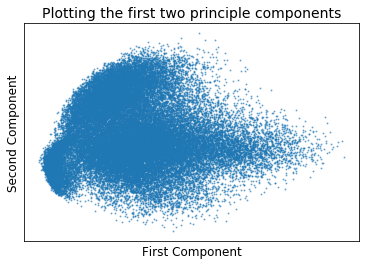

In [15]:
plt.title("Plotting the first two principle components", fontsize=14)
plt.ylabel("Second Component", fontsize = 12)
plt.xlabel("First Component", fontsize = 12)
plt.xticks([])
plt.yticks([])
plt.scatter(X_pca81[:,0], X_pca81[:,1], alpha=.5, s=1)
plt.show()

The first component explains more of the variance than the second component.  This is to be expected because each additional component contributes less to the explained variance than the previous.  There does not appear to be any trends or patterns.  The variance that is not being captured by the first component is being captured by the second. 

Pros: PCA can be used on almost any dataset.  It is extremely versatile and can be used to visualize lots of very complex data. PCA uses the best vector combination so we are getting the best reduction possible.

Cons: PCA has many instances in which it may not function as well. PCA uses Euclidean distance which can cause problems in datasets with categorical data. It also can create problems if we signficantly reduce the dimensionality of our data.

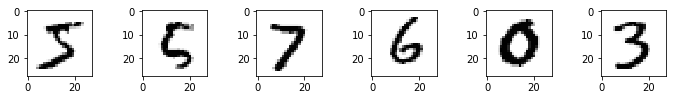

In [21]:
#Plot some of the images, run PCA, then plot again. 
fig = plt.figure(figsize=(12,7))
for i in range(6):
    ax = fig.add_subplot(5,6,i+1)
    ax.grid(False)
    #Pick random numbers by multiplying entry by 2000
    plt.imshow(x[i*2000].reshape((28,28)), cmap='Greys')

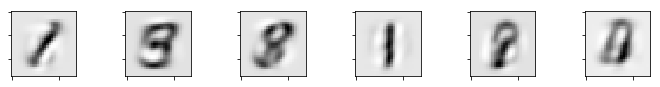

In [25]:
#PCA with 16 components
pca = PCA(n_components=16)
X_16dim = pca.fit_transform(X)

#Transfrom back to its original space
reverse = pca.inverse_transform(X_16dim)

fig = plt.figure(figsize=(12,7))
for ii in range(6):
    ax = fig.add_subplot(5,6,ii+1)
    ax.grid(False)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    #Pick random numbers by multiplying entry by 2000
    plt.imshow(reverse[ii*2000].reshape((28,28)), cmap='Greys')

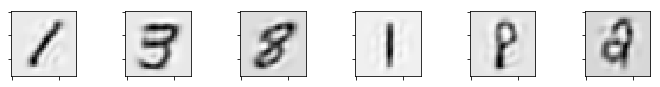

In [24]:
#PCA with 49 components
pca = PCA(n_components=49)
X_49dim = pca.fit_transform(X)

#Transfrom back to its original space
reverse = pca.inverse_transform(X_49dim)

fig = plt.figure(figsize=(12,7))
for ii in range(6):
    ax = fig.add_subplot(5,6,ii+1)
    ax.grid(False)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    #Pick random numbers by multiplying entry by 2000
    plt.imshow(reverse[ii*2000].reshape((28,28)), cmap='Greys')

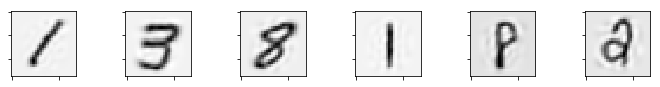

In [26]:
#PCA with 81 components
pca = PCA(n_components=81)
X_81dim = pca.fit_transform(X)

#Transfrom back to its original space
reverse = pca.inverse_transform(X_81dim)

fig = plt.figure(figsize=(12,7))
for ii in range(6):
    ax = fig.add_subplot(5,6,ii+1)
    ax.grid(False)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    #Pick random numbers by multiplying entry by 2000
    plt.imshow(reverse[ii*2000].reshape((28,28)), cmap='Greys')

# T-SNE

In [16]:
print(X.shape)

(42000, 784)


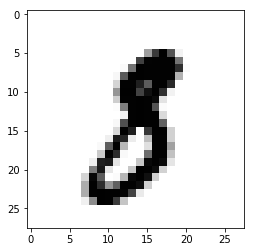

In [17]:
#print a number
plt.imshow(X.loc[1414].values.reshape((28,28)), cmap='Greys')

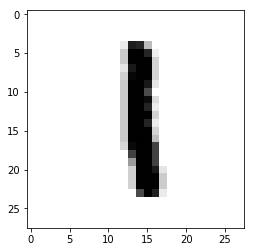

In [18]:
#print a number
plt.imshow(X.loc[4896].values.reshape((28,28)), cmap='Greys')

In [19]:
#Perplexity = 50

#first reduce dimensionality before feeding to t-sne
pca = PCA(n_components=49)
X_pca = pca.fit_transform(X)

rows = np.arange(42000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.013s...
[t-SNE] Computed neighbors for 10000 samples in 8.587s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.916515
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.734375
[t-SNE] KL divergence after 1000 iterations: 1.672095


In [20]:
#create data frame
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

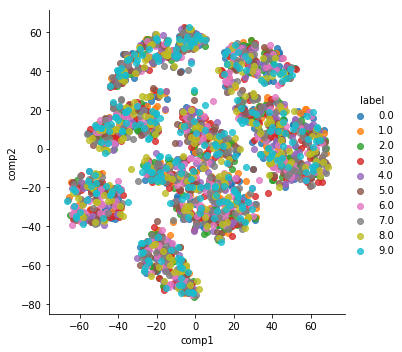

In [21]:
#graph
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

In [30]:
#Perplexity = 100

#first reduce dimensionality before feeding to t-sne
pca = PCA(n_components=49)
X_pca = pca.fit_transform(X)

rows = np.arange(42000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=0, perplexity=100, n_iter=1000, learning_rate=2000)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

In [31]:
#create the dataframe
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

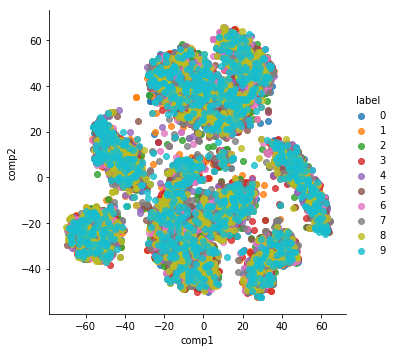

In [32]:
#plot
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

In [85]:
#Perplexity = 5

#first reduce dimensionality before feeding to t-sne
pca = PCA(n_components=49)
X_pca = pca.fit_transform(X)

rows = np.arange(42000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.012s...
[t-SNE] Computed neighbors for 10000 samples in 6.821s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.108149
[t-SNE] KL divergence after 250 iterations with early exaggeration: 94.891342
[t-SNE] KL divergence after 1000 iterations: 1.927473


In [86]:
#create the dataframe
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

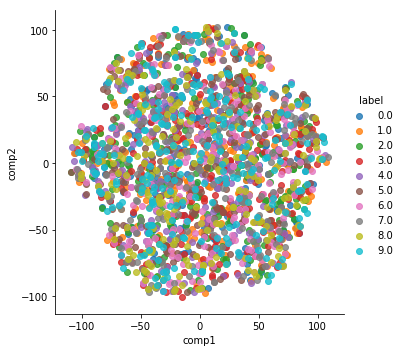

In [87]:
#plot
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

This plot is much easier to interpret and to gather insights from.

So it seems overall that our model is pretty robust when it comes to changes in the learning rate.

## K-means Clustering

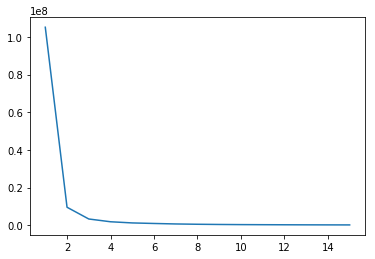

In [36]:
#use the elbow method to choose k
sses = []
for k in range(1,16):
    kmeans = KMeans(n_clusters=k, n_init=50, n_jobs=-1)
    kmeans.fit(train[['label', 'pixel100']])
    sses.append(kmeans.inertia_)
plt.plot(range(1,16), sses)

In [37]:
#choose k=10 because there are 10 digits
kmeans = KMeans(n_clusters=10, n_init=50, n_jobs=-1)
kmeans.fit(train)
sk_clusters = kmeans.predict(train)

(0, 255)

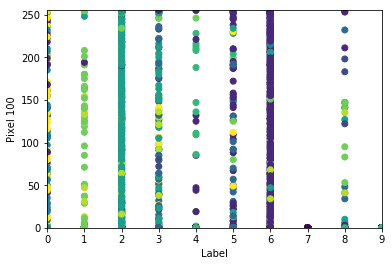

In [76]:
#plot one pixel with label
plt.scatter(train['label'], train['pixel100'], c=sk_clusters)
plt.xlabel("Label")
plt.ylabel("Pixel 100")
plt.xlim(0,9)
plt.ylim(0,255)

(0, 255)

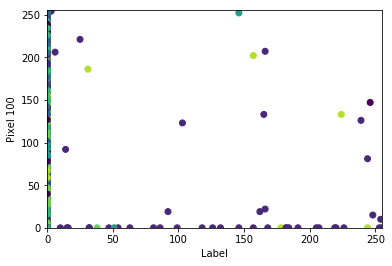

In [83]:
#plot one pixel with another
plt.scatter(train['pixel44'], train['pixel404'], c=sk_clusters)
plt.xlabel("Label")
plt.ylabel("Pixel 100")
plt.xlim(0,255)
plt.ylim(0,255)

(0, 255)

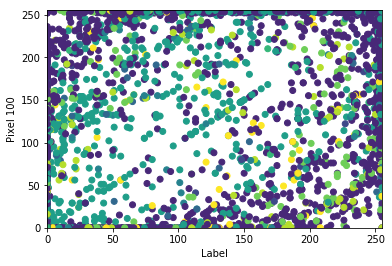

In [81]:
#plot two pixels right next to each other
plt.scatter(train['pixel101'], train['pixel100'], c=sk_clusters)
plt.xlabel("Label")
plt.ylabel("Pixel 100")
plt.xlim(0,255)
plt.ylim(0,255)

These graphs don't really tell us anything but they're pretty cool to look at. 

In [41]:
print("Adjusted Rand Score: {}"
      .format(adjusted_rand_score(y, sk_clusters)))

Adjusted Rand Score: 0.3618413806399958


In [43]:
print("Completeness Score: {}"
      .format(completeness_score(y, sk_clusters)))

Completeness Score: 0.4976544823766626


Text(0.5, 1.0, 'Truth')

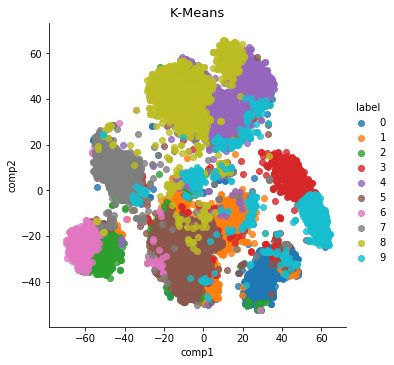

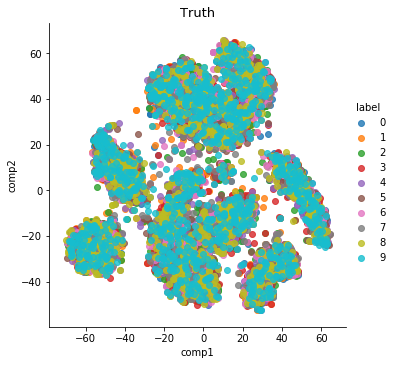

In [46]:
#Visualize your clusters using t-sne
df_kmeans = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_kmeans['label'] = sk_clusters[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_kmeans,hue='label',fit_reg=False)
plt.title("K-Means",fontsize=13)

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title("Truth",fontsize=13)

We did not need to scale the data because it was already between 0-255.

Our model seems to change according to the sample size in which we give it. Overall there do not seem to be any large changes, however it does look like it is not very robust.

## Hierarchical Clustering

In [50]:
#allow for a random sample of 100 observations from the MNIST data
rows = np.arange(70000)
np.random.shuffle(rows)
n_select_100 = 100

Text(0.5, 1.0, 'Complete Linkage Dendrogram')

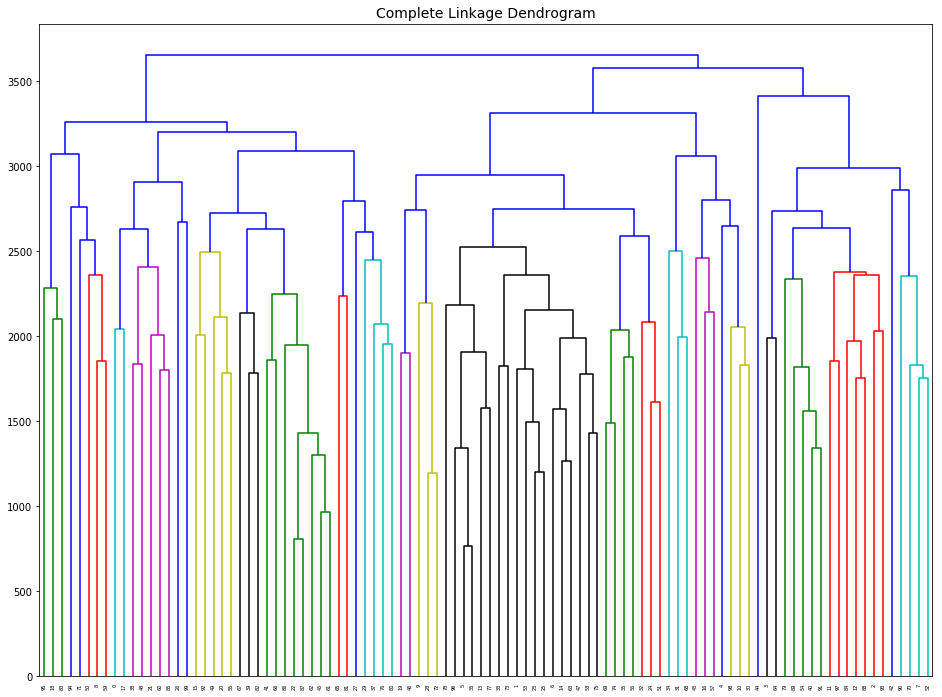

In [51]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(x[rows[:n_select_100],:], 'complete')
plt.figure(figsize=(16, 12))
dendro_complete = dendrogram(Z)
plt.title("Complete Linkage Dendrogram", fontsize=14)

It appears that 9-11 clusters would be best.  Since we have 10 digits, this works perfectly.

Text(0.5, 1.0, 'Ward Linkage Dendrogram')

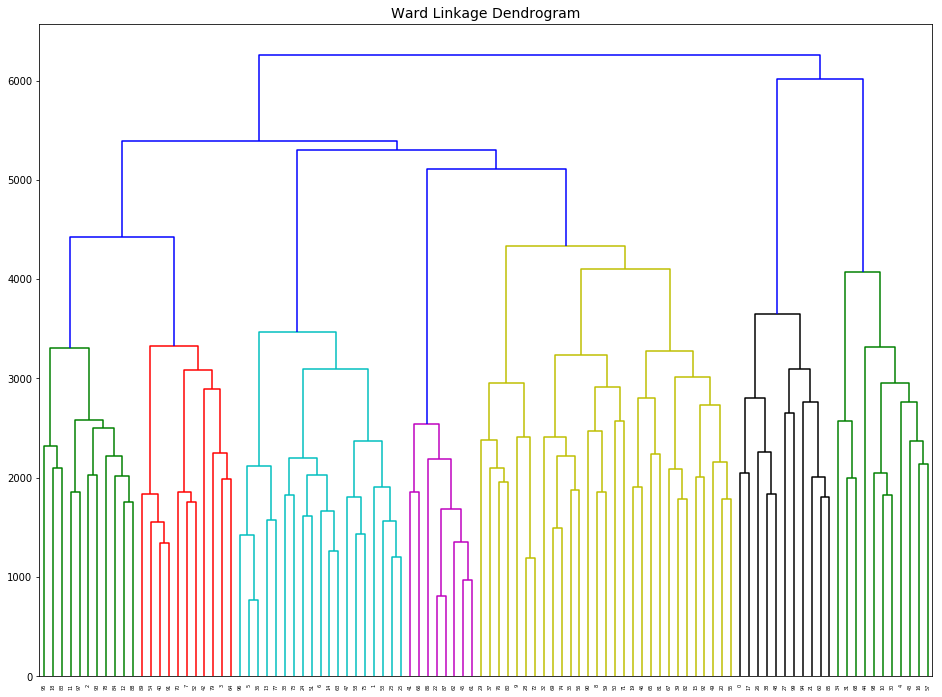

In [53]:
#Use Ward Linkage method
W = linkage(x[rows[:n_select_100],:], 'ward')
plt.figure(figsize=(16, 12))
dendro_ward = dendrogram(W)
plt.title("Ward Linkage Dendrogram", fontsize=14)

This cluster is more distinct than our first dendrogram that we made.  It only has 7 main groups which is signifcantly less than the 10 that we need. 

Text(0.5, 1.0, 'Single Linkage Dendrogram')

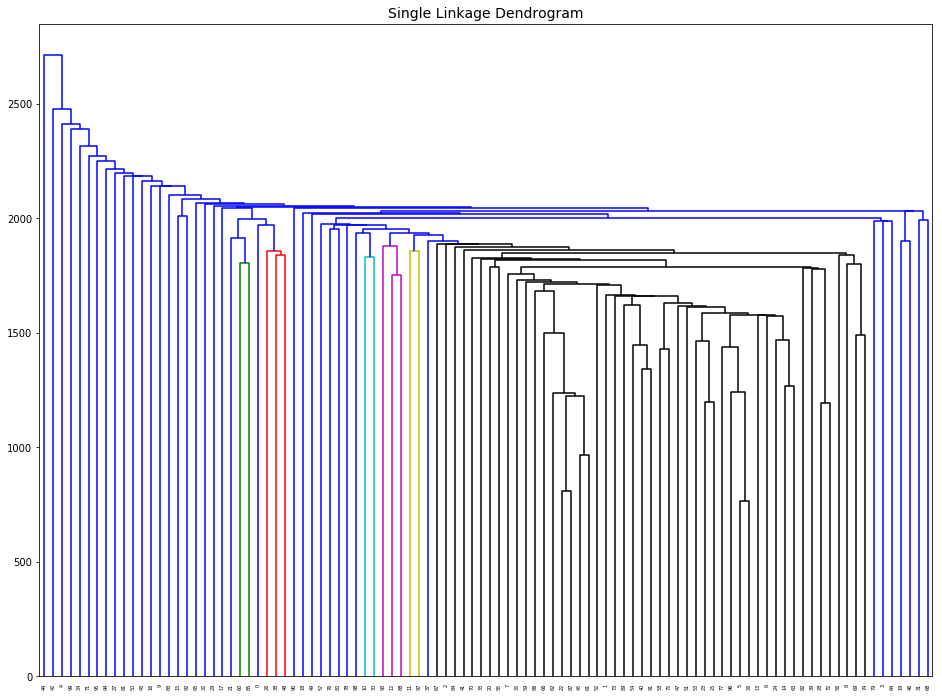

In [54]:
#Use Simple Linkage method
Y = linkage(x[rows[:n_select_100],:], 'single')
plt.figure(figsize=(16, 12))
dendro_single = dendrogram(Y)
plt.title("Single Linkage Dendrogram", fontsize=14)

This was the least successful of the three methods. Clustering does not occur until much later in the process.